In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("train_rnn.csv")
data.head()

In [ ]:
data.shape

(1258, 6)

In [ ]:
training_set = data.iloc[:,1:2].values

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled[0:5,:]

In [ ]:
training_set_scaled.shape

In [ ]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [ ]:
x_train[0].shape

In [ ]:
len(x_train)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
x_train = np.reshape(x_train, (1198, 60, 1))

In [ ]:
# Building the model
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=200, batch_size=32)

In [ ]:
# import the testing data
data_test = pd.read_csv("test_rnn.csv")
real_prices = data_test.iloc[:,1:2].values

dataset_total = pd.concat((data['Open'], data_test['Open']), axis=0)


In [ ]:
data_test.shape

In [ ]:
inputs = dataset_total[1198 :].values
inputs.shape

In [ ]:
inputs = inputs.reshape(-1,1)

inputs.shape

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (20,60,1))

pred_prices = model.predict(x_test)
pred_prices = sc.inverse_transform(pred_prices)

In [ ]:
real_prices.shape

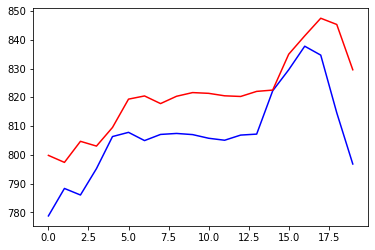

In [ ]:
plt.plot(real_prices, c='blue')
plt.plot(pred_prices, c='red')
plt.show()